In [2]:
import json, argparse, os
from turtle import width
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.lines import Line2D
from matplotlib.widgets import Slider, TextBox
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colorbar import ColorbarBase
import matplotlib.animation as animation
from matplotlib import markers, rcParams
import numpy as np
import seaborn as sns
plt.style.use("./tplot.mplstyle")

In [96]:
Nis=np.array([20,30,40, 49,50, 60, 75, 80, 100])
#Nis=[50]
ab=10.0
t2=20.0
t3=50.0
a=10.0
b=1.0
omega0s=np.array([0.0532,0.0648,0.0532,0.0604,0.0604,0.0532,0.0557,0.0621,0.0604])
inits = np.arange(100, 1700, 100)
dt_dump=1.0 
#tf=np.array([10050.1,10050.1,10050.1,20050.1001,20050.1001,20050.1001,10050.1001,10050.1001])
tf=10001.1*np.ones_like(Nis)

In [97]:
Solsn=[]
j=0
for N in Nis:
    print(N)
    Solsn.append(np.zeros(( len(inits), int(tf[j]/dt_dump), N+1)))
    for i in np.arange(len(inits)):
        Solsn[-1][i] += ((np.fromfile("osc_strain_phase/{:d}/{:1.1f}/{:1.1f}/{:1.1f}/{:1.3f}/solution_{:1.2f}.dat".format(N, ab, t2, t3, omega0s[j], inits[i]))).reshape(int(tf[j]/dt_dump), 3*N+1))[:,:N+1]
    Solsn[-1]-=np.arange(0,N+1,1)[np.newaxis,np.newaxis,:]  #these are now just disp fields
    j+=1

20
30
40
49
50
60
75
80
100


/var/folders/ch/hvt754js3b919ry3lnvfz0_c0000gn/T/ipykernel_98885/905574441.py:10: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(Sols[:,tstart,n]/A)


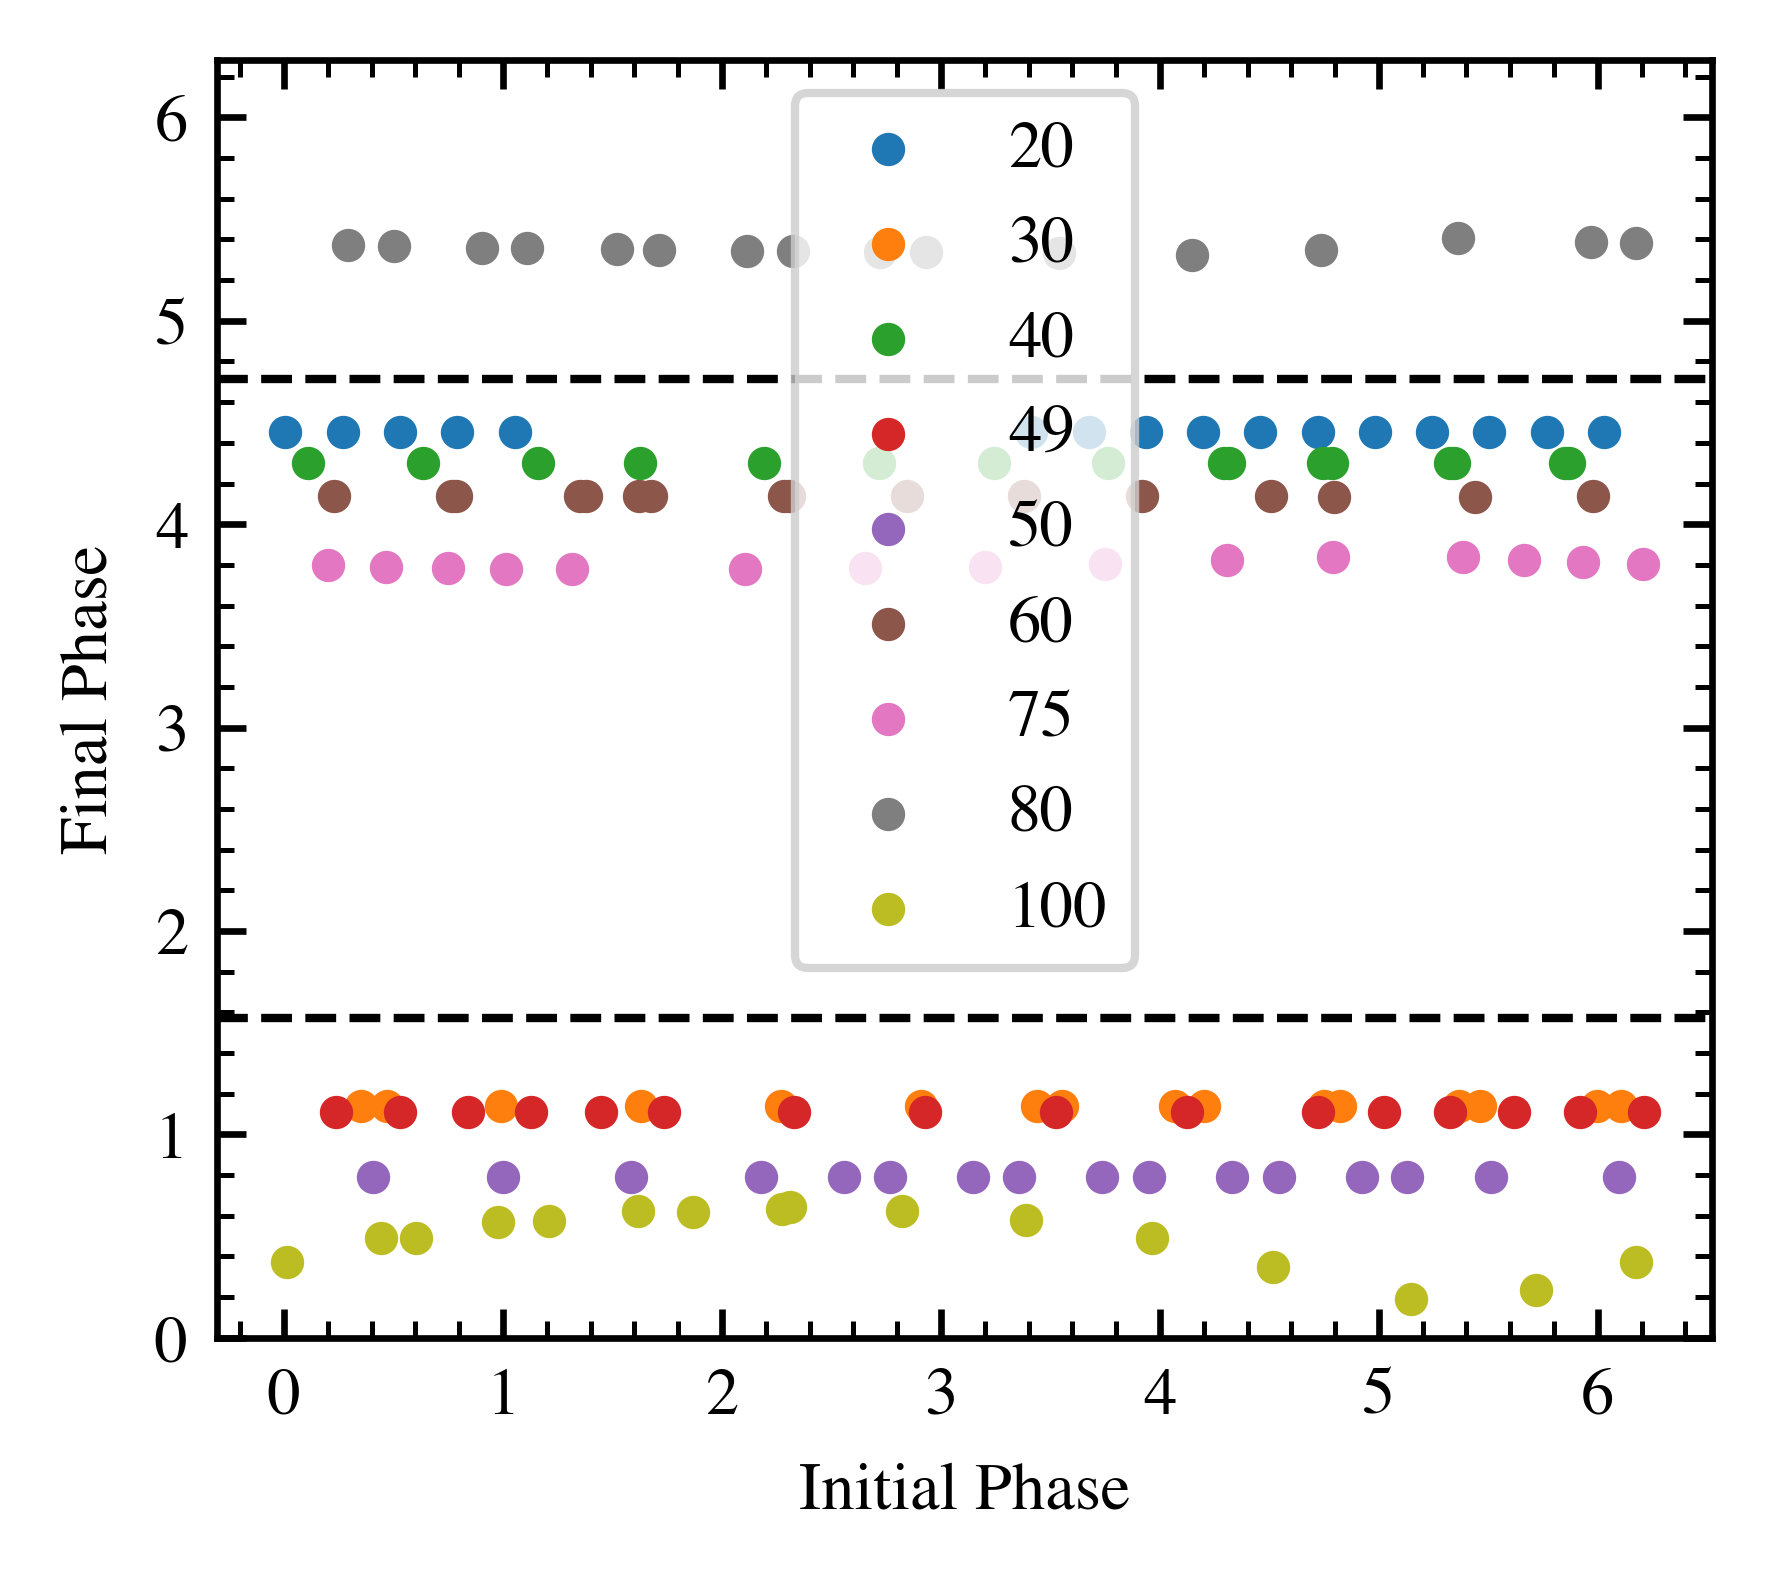

In [98]:
phasesn=[]
finphasesn=[]
finampsn=np.zeros_like(Nis) #final amplitudes of the nth cell
tstart=1 #500 for old data
for j in np.arange(len(Nis)):
    Sols=Solsn[j]
    n=10
    A = np.max(np.abs(Sols[:,:tstart,n]))
    Delta = Sols[:,tstart,n]-Sols[:,tstart-1,n]
    theta = np.arcsin(Sols[:,tstart,n]/A)
    theta=np.where(np.sign(Delta) == np.sign(theta), theta, np.sign(theta)*(np.pi-np.abs(theta)))   #this is in -pi/2, pi/2
    phasesn.append(np.where(theta<0, np.pi-theta, theta)) #this is in 0 to pi
    #relphase = -phase   #since the pull is leftward, pull function is actually -sin(wt)=sin(-wt), so phase relative to the pull is -ve

    #find_final phase
    A = np.max(np.abs(Sols[:,-5000:,n]))
    finampsn[j]+=A
    Delta = Sols[:,-1,n]-Sols[:,-2,n]
    theta = np.arcsin(Sols[:,-1,n]/A)
    theta=np.where(np.sign(Delta) == np.sign(theta), theta, np.sign(theta)*(np.pi-np.abs(theta)))   #this is in -pi/2, pi/2
    finphasesn.append(np.where(theta<0, np.pi-theta, theta)) #this is in 0 to pi
    #relphase = -phase   #since the pull is leftward, pull function is actually -sin(wt)=sin(-wt), so phase relative to the pull is -ve
    plt.scatter(phasesn[-1], finphasesn[-1],label=Nis[j])
    plt.ylim(0,2*np.pi)
phasesn=np.asarray(phasesn)
finphasesn=np.asarray(finphasesn)
plt.axhline(3*np.pi/2, linestyle='dashed', color='k')
#plt.axhline(np.pi, linestyle='dashed', color='k')
plt.axhline(np.pi/2, linestyle='dashed', color='k')
plt.legend()
plt.xlabel('Initial Phase')
plt.ylabel('Final Phase')
plt.show()

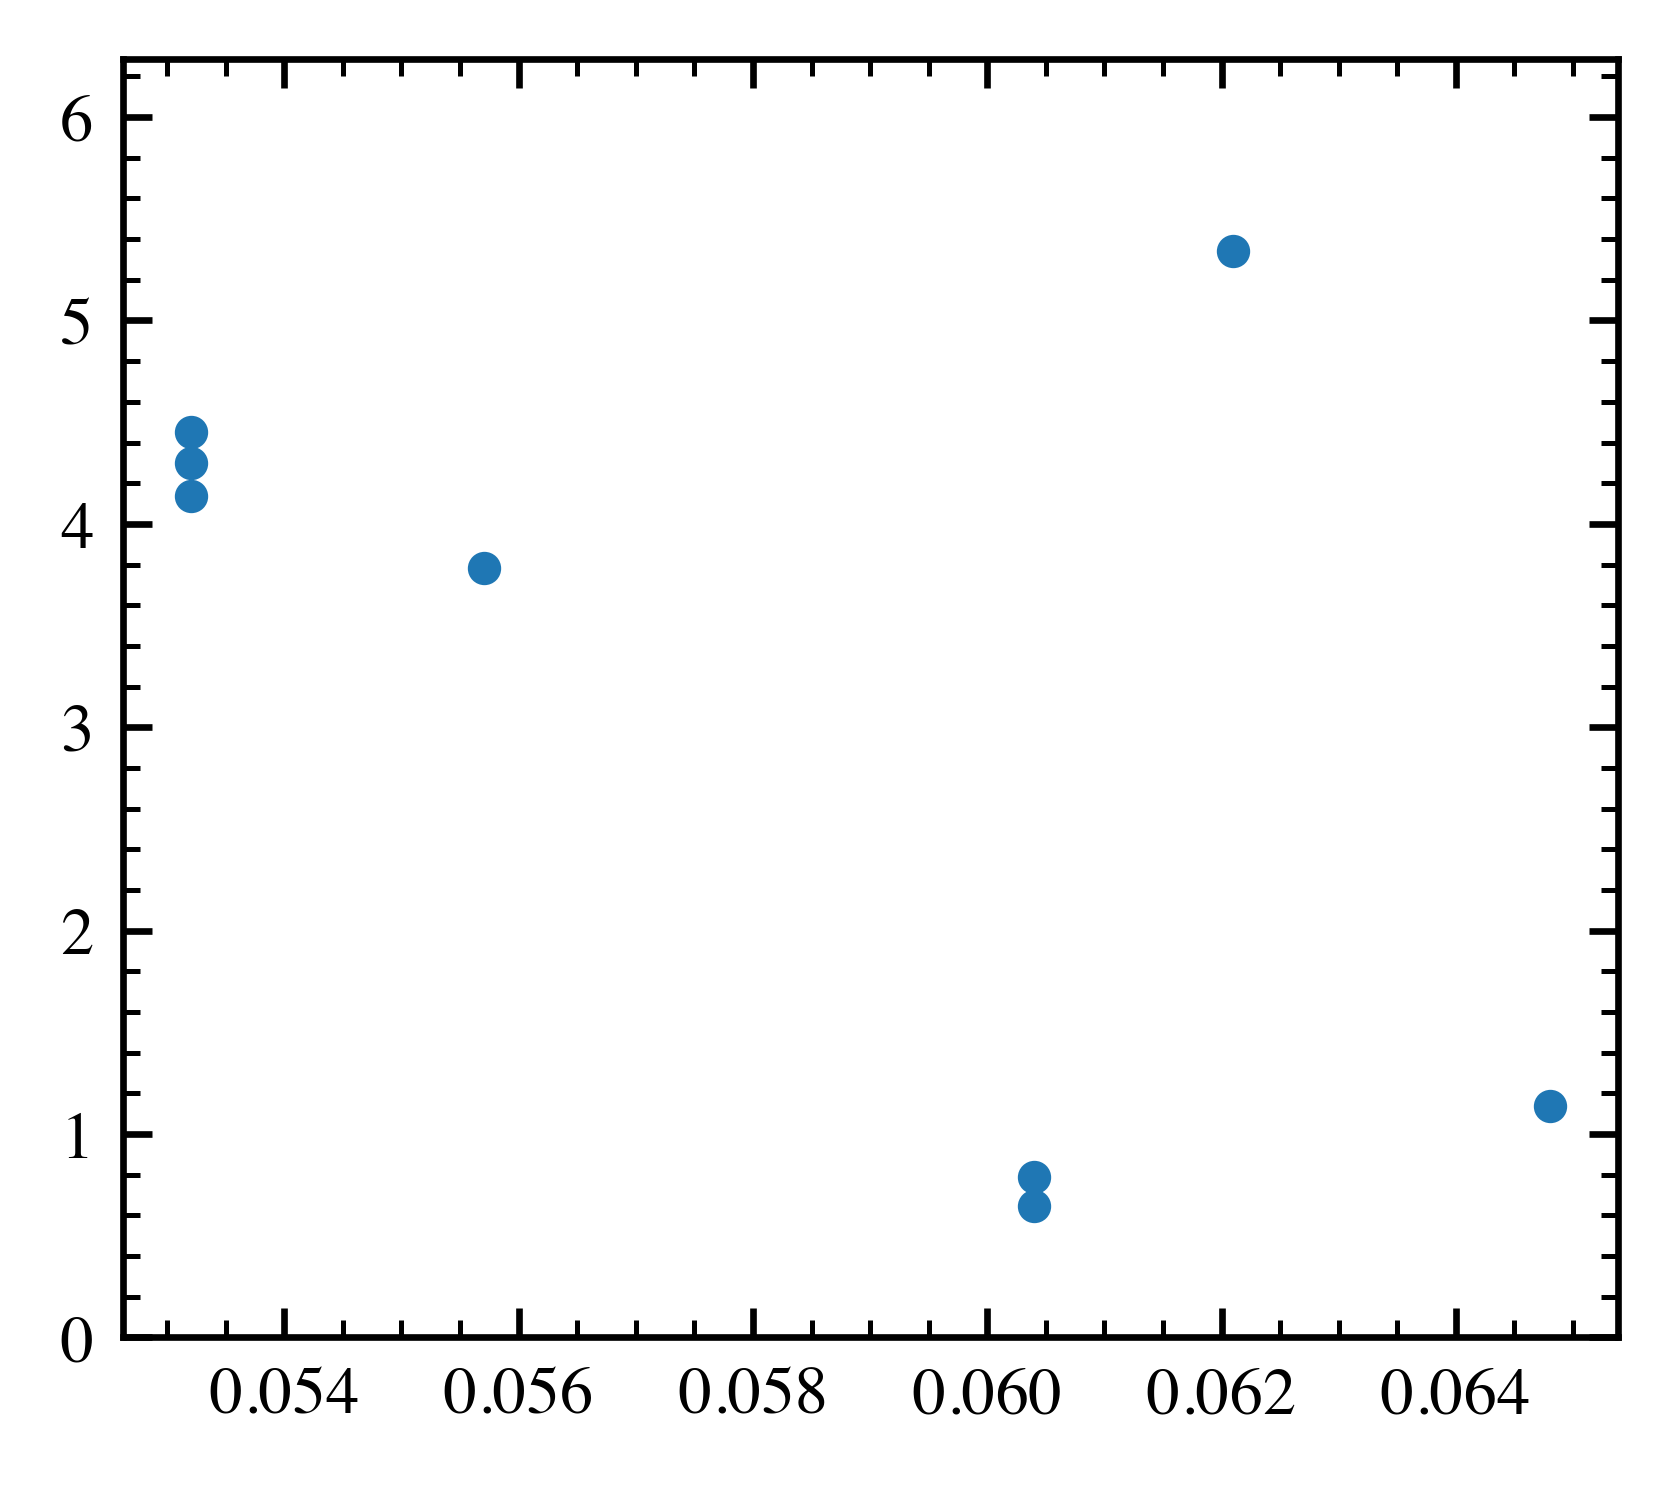

In [81]:
plt.scatter(omega0s[:], finphasesn[:,0])
plt.ylim(0,2*np.pi)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


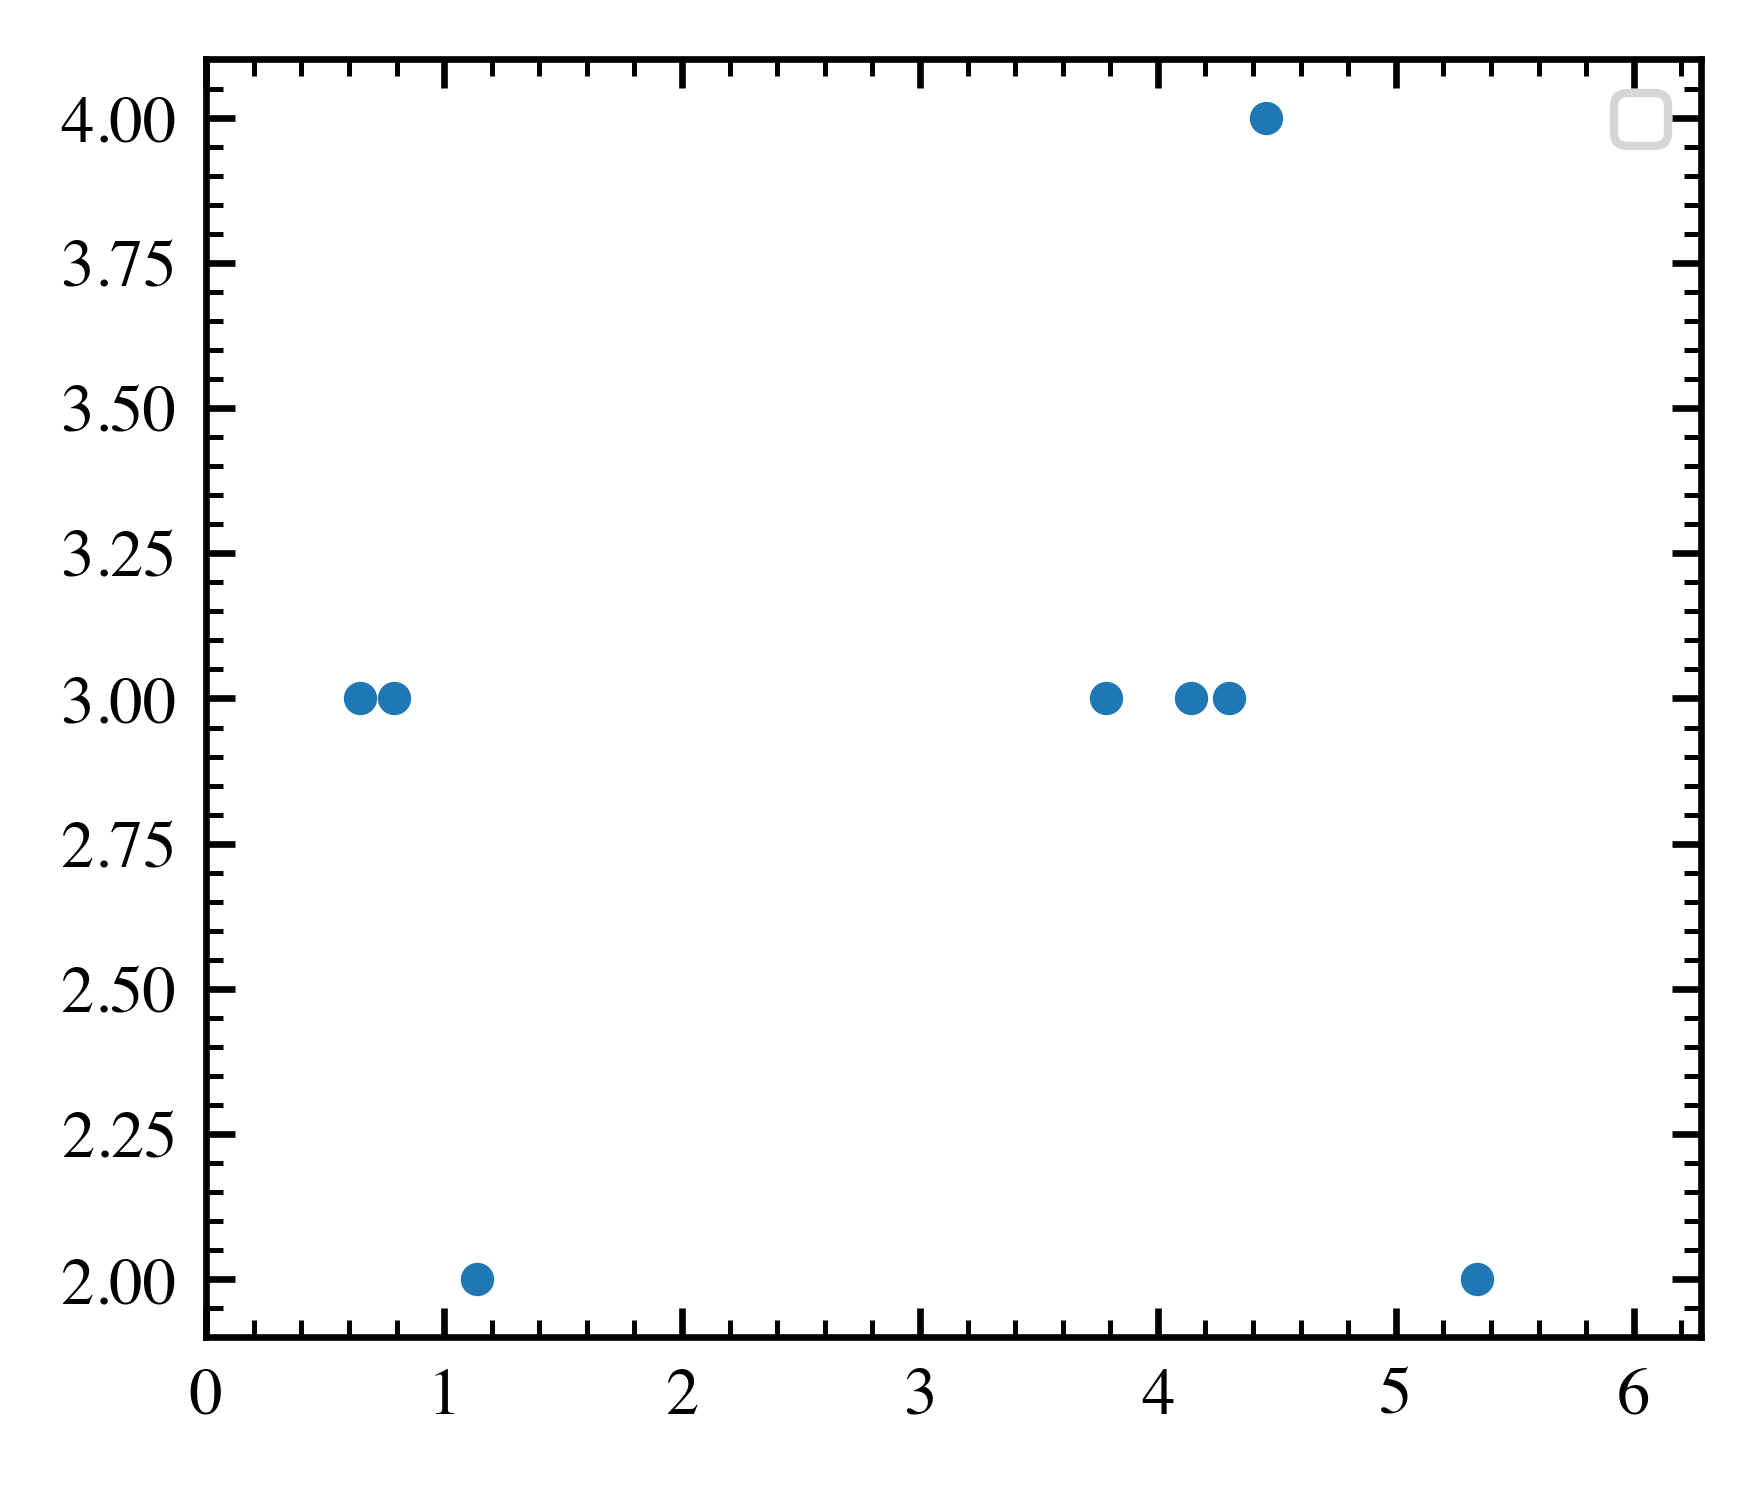

In [82]:
plt.scatter(finphasesn[:,0], finampsn)
plt.xlim(0,2*np.pi)
plt.legend()
plt.show()

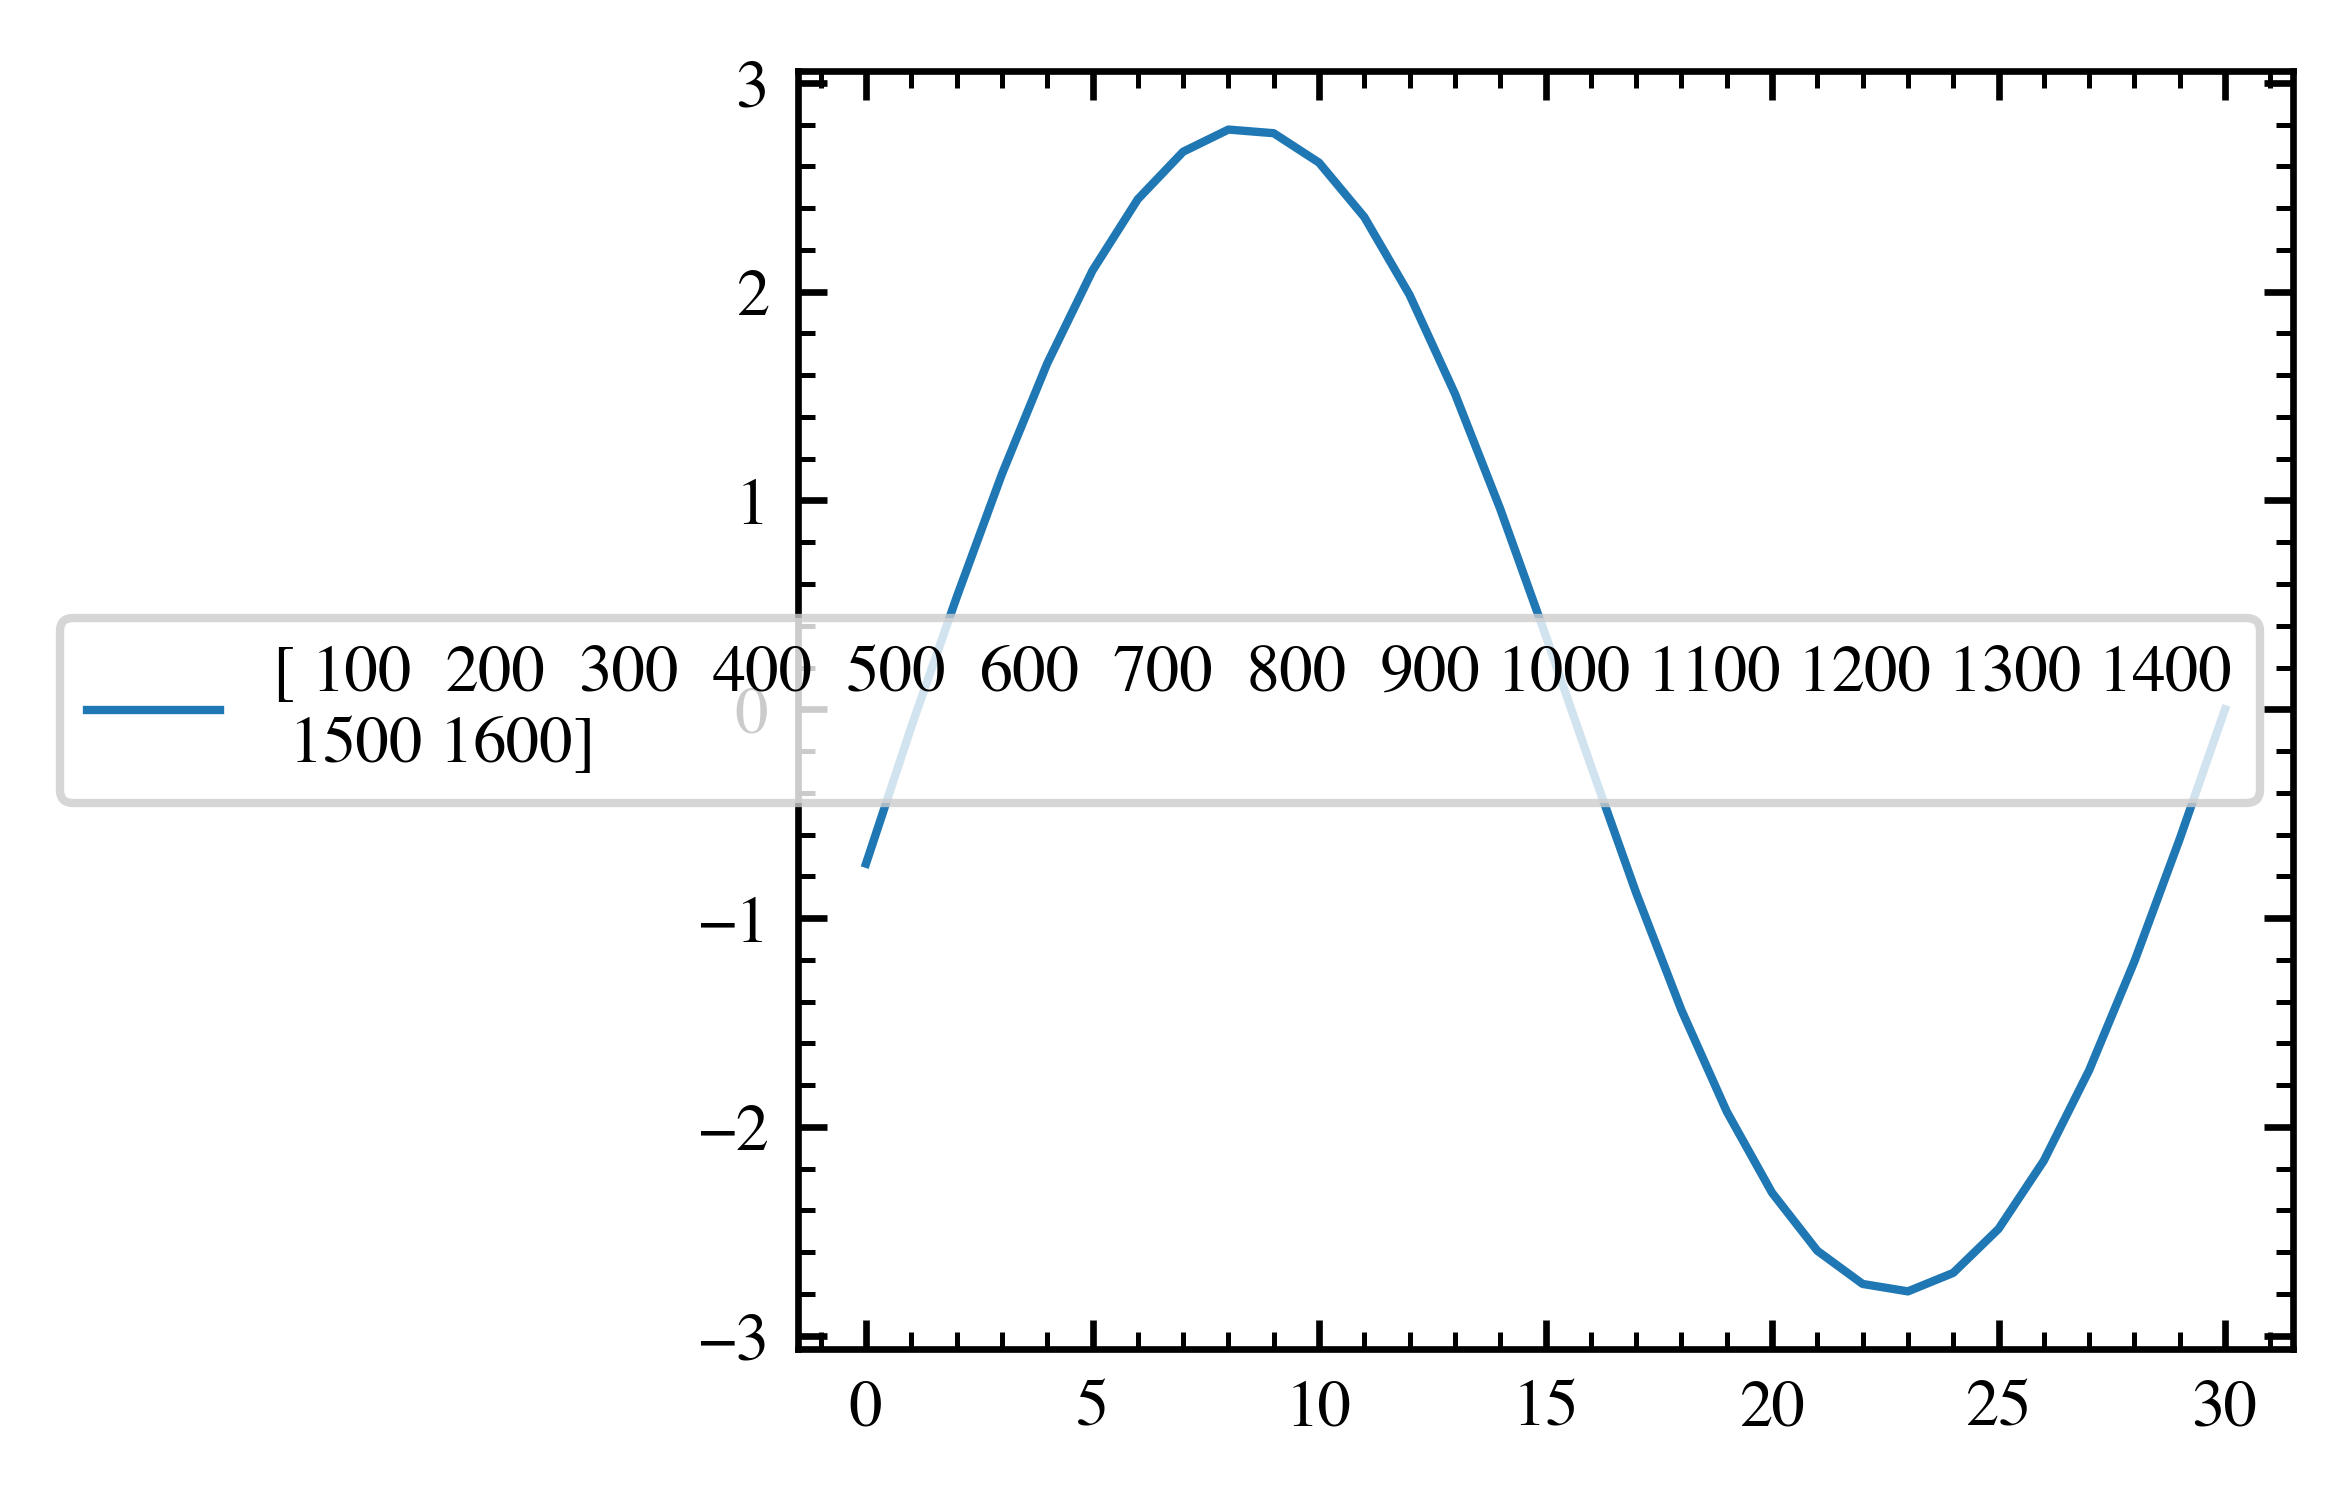

In [83]:
plt.plot(np.arange(0,Nis[1]+1,1), Solsn[1][-1,-1].T, label=inits)
plt.legend()
plt.show()

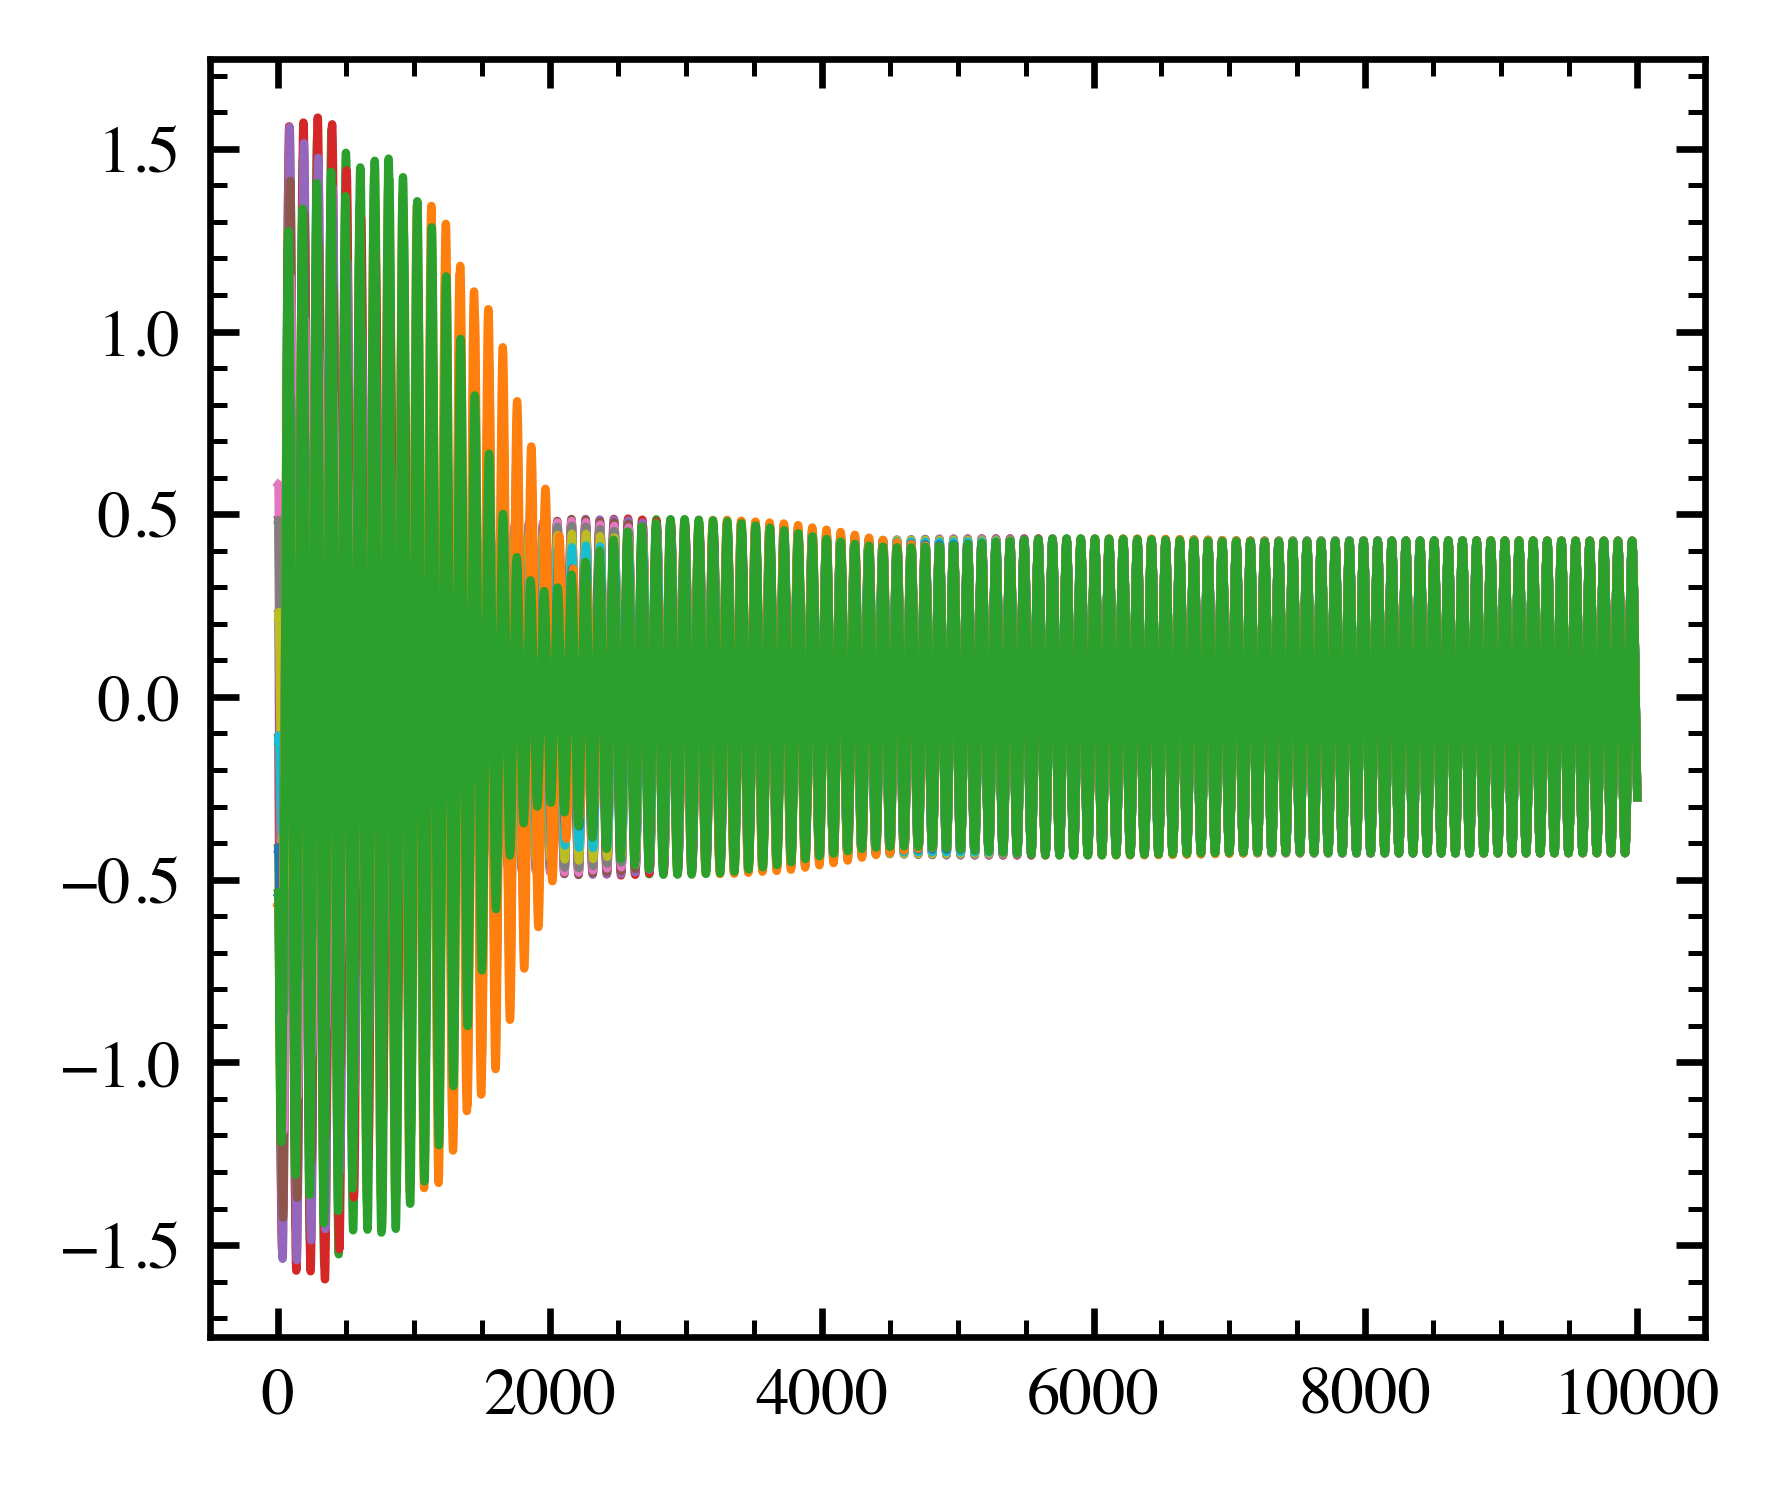

In [89]:
#plot trajectory of nth cell through time.
n=1
j=3
times=np.arange(0,tf[j],dt_dump)
plt.plot(times[1:], Solsn[j][:-3,:,n].T , label=inits[:-3])
#plt.axvline(50, linestyle='dashed',color='k')
#plt.legend()
plt.show()

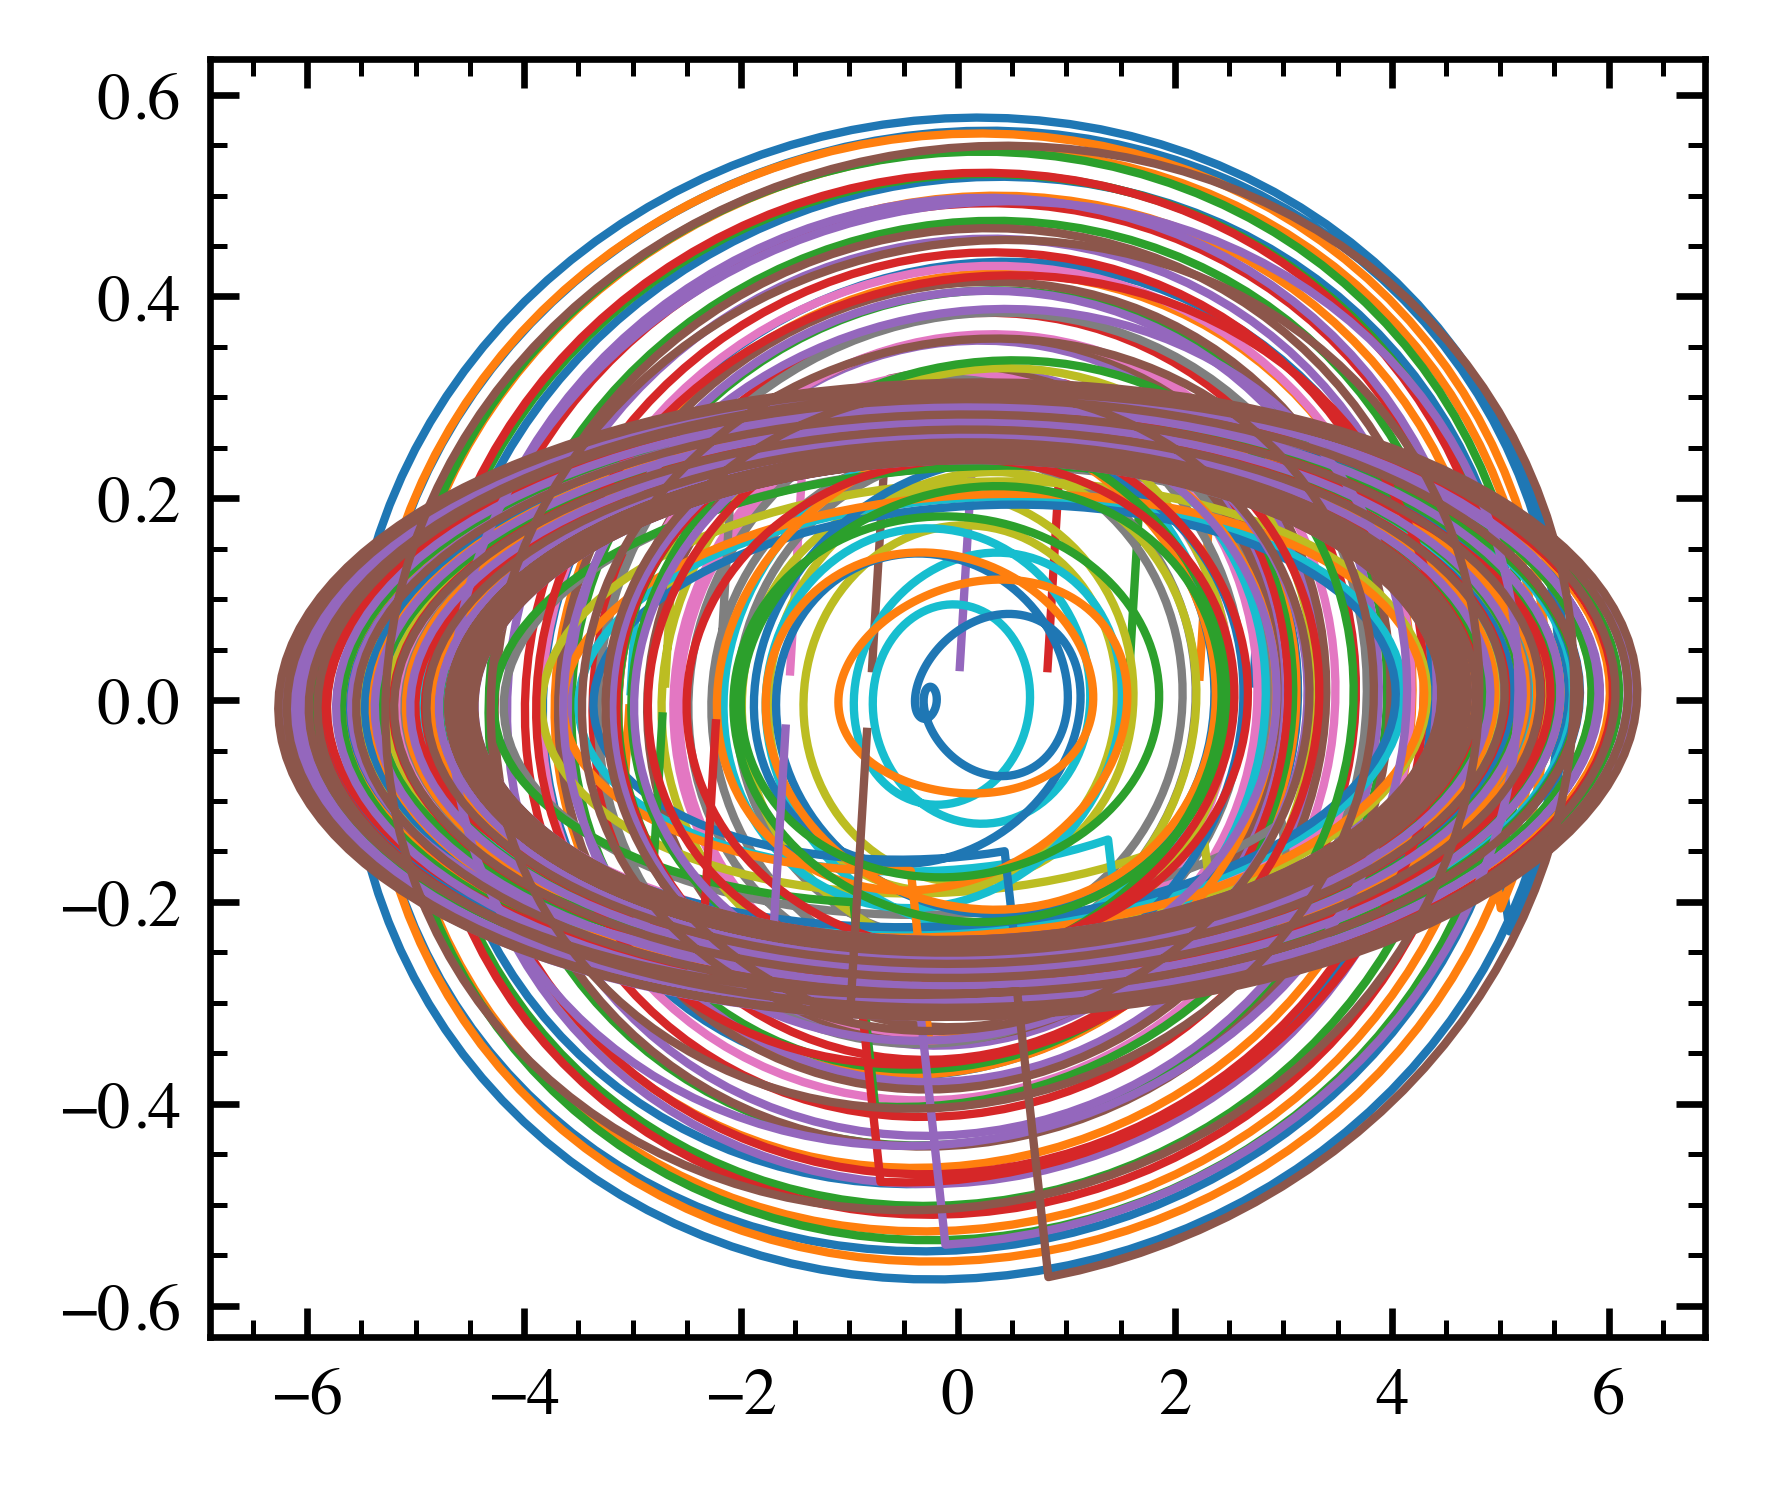

In [86]:
#phase portrait
velsn=[]
for j in np.arange(len(Nis)):
    vels=np.append((Solsn[j][:,1:501,:]-Solsn[j][:,0:500,:])/(dt_dump/2) , (Solsn[j][:,501:,:]-Solsn[j][:,500:-1,:])/dt_dump, axis=1)
    velsn.append(vels)
j=0
n=10
p=10
for p in np.arange(len(inits)):
    plt.plot(Solsn[j][p,1:,n], velsn[j][p,:,n])
plt.show()